In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_row',None)

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1 
# Problem Statement

To predict the price of a car using diff / various features 

Accuracy == 95%

# Step 2 
# Data Gathering

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv',encoding='Latin-1')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Step 3
# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### 3.1 symboling

In [4]:
df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

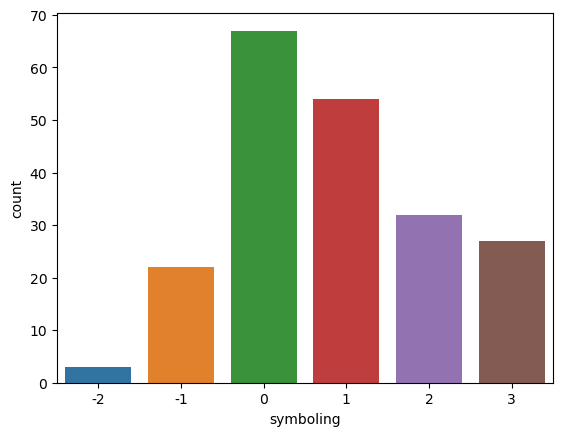

In [5]:
sns.countplot(x ='symboling', data = df)


# count plot on two categorical variable
# sns.countplot(x ='symboling', hue = "CarName", data = df)
 
# Show the plot
plt.show()

<Axes: xlabel='symboling', ylabel='price'>

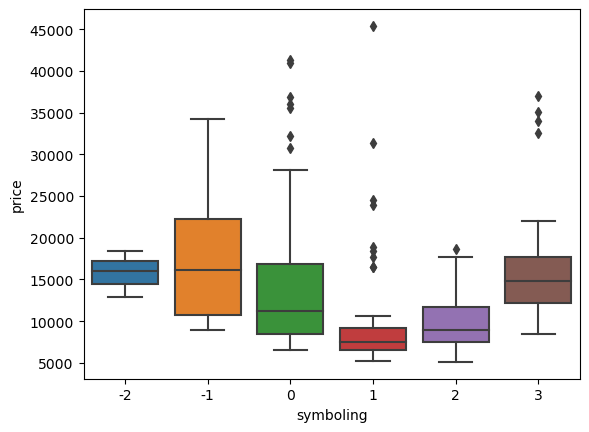

In [6]:
sns.boxplot(x=df['symboling'], y=df['price'])

### 3.2 CarName

In [7]:
df.CarName.value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

<Axes: xlabel='CarName', ylabel='count'>

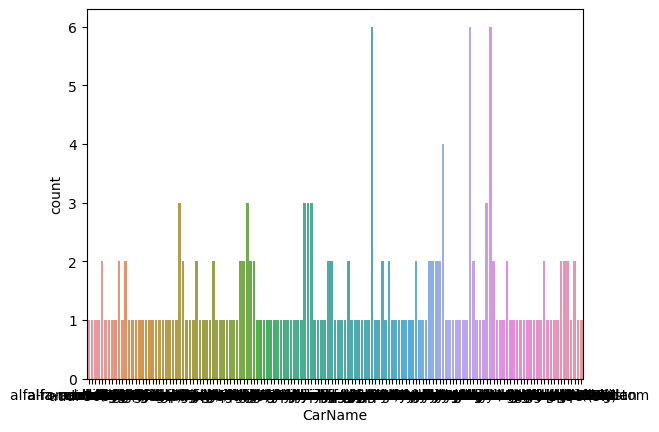

In [8]:
sns.countplot(x ='CarName', data = df)

In [9]:
CompanyName=df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,'CompanyName',CompanyName)

In [10]:
# def name(x):
#     var=x.split(' ')[0]
#     return var
# df['Compay_name']=df['CarName'].apply(name)

# df.drop('CarName',axis=1,inplace=True)


In [11]:
df['CompanyName']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CompanyName, Length: 205, dtype: object

In [12]:
df

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [13]:
df.drop('CarName',axis=1, inplace=True)

In [14]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
df.CompanyName.value_counts().to_dict()

{'toyota': 31,
 'nissan': 17,
 'mazda': 15,
 'honda': 13,
 'mitsubishi': 13,
 'subaru': 12,
 'peugeot': 11,
 'volvo': 11,
 'volkswagen': 9,
 'dodge': 9,
 'buick': 8,
 'bmw': 8,
 'audi': 7,
 'plymouth': 7,
 'saab': 6,
 'isuzu': 4,
 'porsche': 4,
 'alfa-romero': 3,
 'chevrolet': 3,
 'jaguar': 3,
 'vw': 2,
 'maxda': 2,
 'renault': 2,
 'toyouta': 1,
 'vokswagen': 1,
 'Nissan': 1,
 'mercury': 1,
 'porcshce': 1}

In [16]:
df['CompanyName'].replace({
'toyota': 'Toyota',
 'nissan': "Nissan",
 'mazda': "Mazda",
 'honda': "Honda",
 'mitsubishi': "Mitsubishi",
 'subaru':'Subaru',
 'peugeot': 'Peugeot',
 'volvo': 'Volvo',
 'volkswagen': 'Volkswagen',
 'dodge': 'Dodge',
 'buick': 'Buick',
 'bmw': 'BMW',
 'audi': "Audi",
 'plymouth': 'Plymouth',
 'saab':'Saab',
 'isuzu': 'Isuzu',
 'porsche': 4,
 'alfa-romero': 'Alfa-Romero',
 'chevrolet': 'Chevrolet',
 'jaguar': 'Jaguar',
 'vw': 'Volkswagen',
 'maxda': "Mazda",
 'renault': 'Renault',
 'toyouta': 'Toyota',
 'vokswagen': 'Volkswagen',
 'Nissan': 'Nissan',
 'mercury': 'Mercury',
 'porcshce': 'Porcshce'},inplace=True)

In [17]:
df

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,Alfa-Romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,Alfa-Romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,Alfa-Romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,Audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,Audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,Volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,Volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,Volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,Volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


<Axes: xlabel='CompanyName', ylabel='count'>

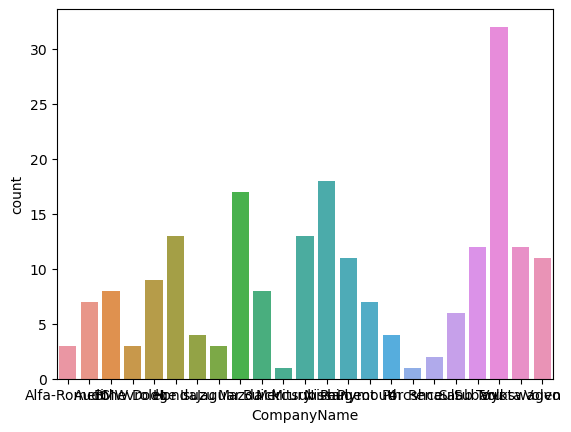

In [18]:
sns.countplot(x='CompanyName', data=df,)

<Axes: xlabel='CompanyName', ylabel='price'>

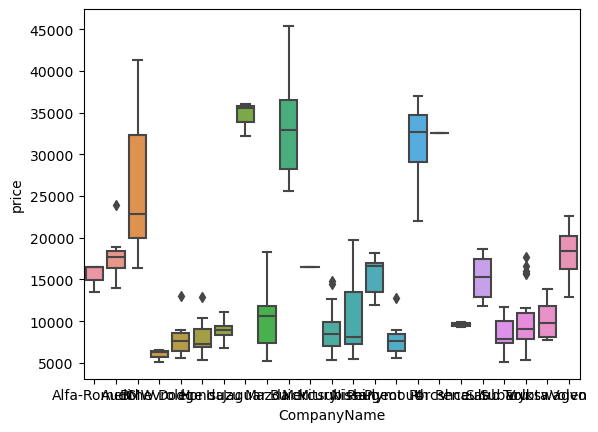

In [19]:
sns.boxplot(x=df['CompanyName'],y=df['price'])

### 3.3 fueltype

In [20]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

<Axes: xlabel='fueltype', ylabel='count'>

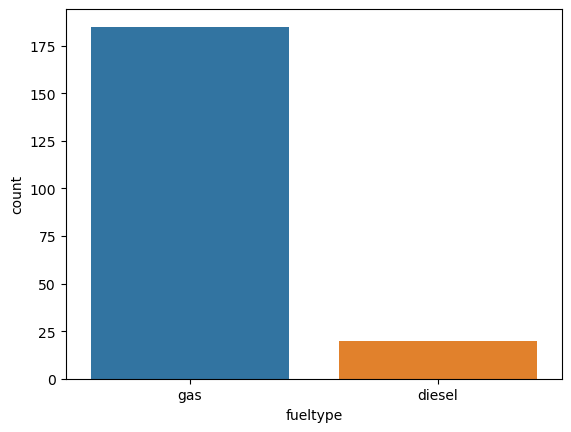

In [21]:
sns.countplot(data=df, x='fueltype')

<Axes: xlabel='fueltype', ylabel='price'>

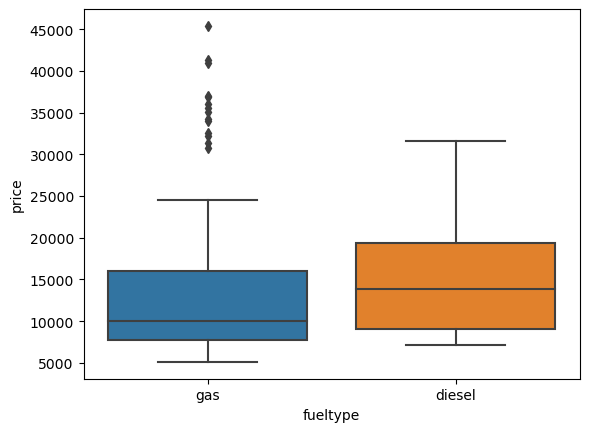

In [22]:
sns.boxplot(x=df['fueltype'],y=df['price'])

In [23]:
# significant impact on price with gas and diesel engine 

### 3.4 aspiration

In [24]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

<Axes: xlabel='aspiration', ylabel='count'>

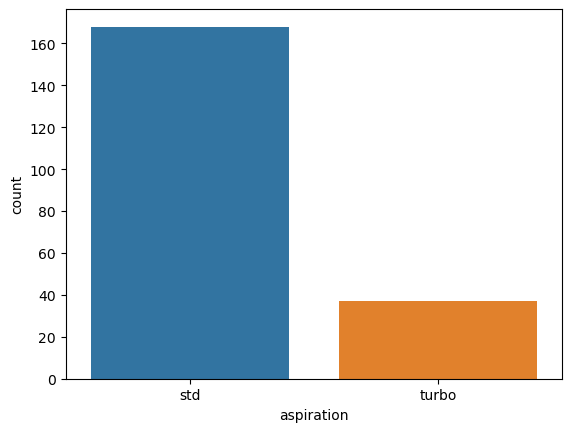

In [25]:
sns.countplot(data=df,x='aspiration')

<Axes: xlabel='aspiration', ylabel='price'>

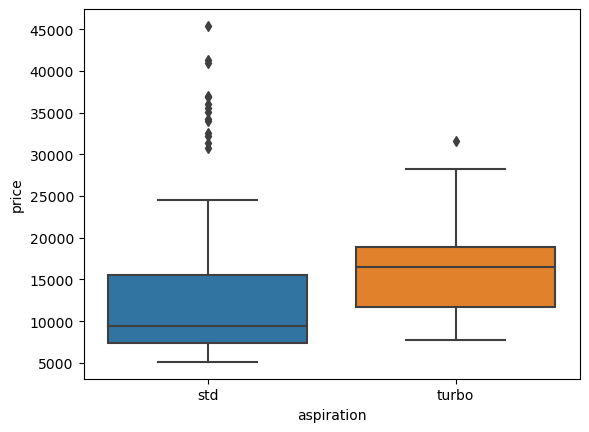

In [26]:
sns.boxplot(x=df['aspiration'], y=df['price'])


In [27]:
# significant impact price varies with aspiration (compaaire lower and upper tail)

### 3.5 doornumber

In [28]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

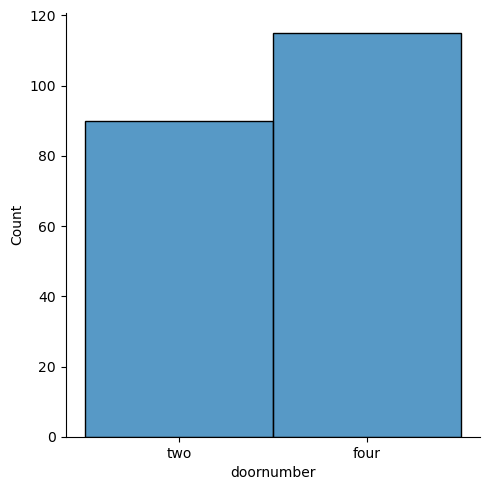

In [29]:
sns.displot(df['doornumber'])

<Axes: xlabel='doornumber', ylabel='count'>

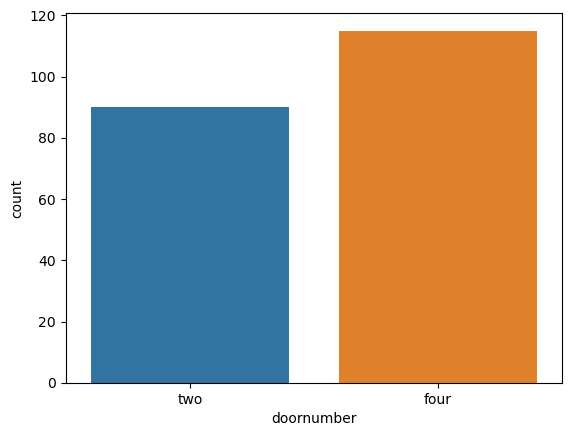

In [30]:
sns.countplot(x='doornumber',data=df)

<Axes: xlabel='doornumber', ylabel='price'>

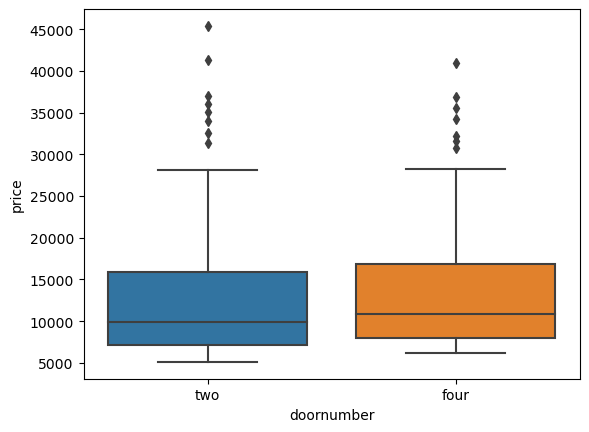

In [31]:
sns.boxplot(x=df['doornumber'],y=df['price'])

In [32]:
#  ther is no impact of number of doors on the price.
#  we can drop the column "doornumber"

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## 3.6 carbody 

In [34]:
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

<Axes: xlabel='carbody', ylabel='count'>

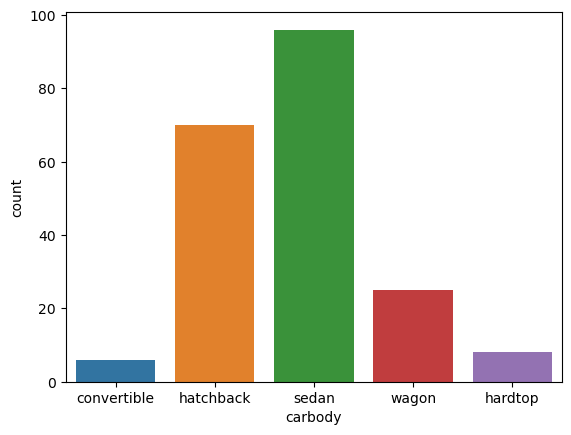

In [35]:
sns.countplot(x='carbody',data=df)

<Axes: xlabel='carbody', ylabel='price'>

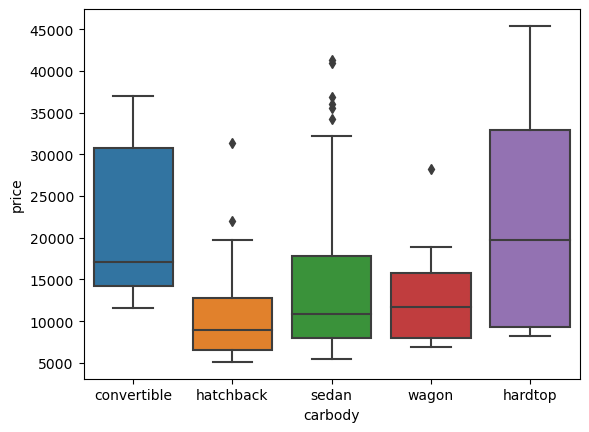

In [36]:
sns.boxplot(x=df['carbody'], y=df['price'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## 3.7 drivewheel 

In [38]:
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

<Axes: xlabel='drivewheel', ylabel='price'>

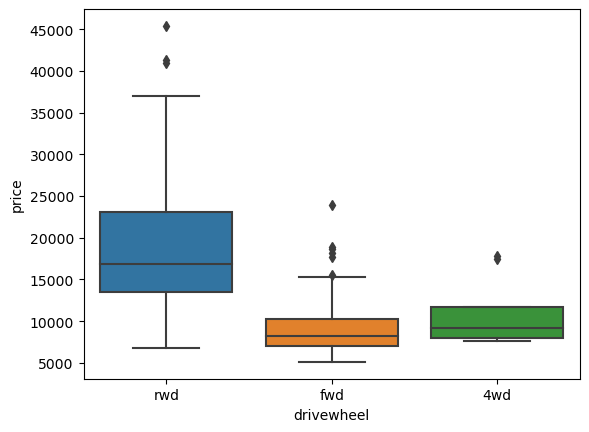

In [39]:
sns.boxplot(x=df['drivewheel'], y=df['price'])

## 3.8 enginelocation     

In [40]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

<Axes: xlabel='enginelocation', ylabel='price'>

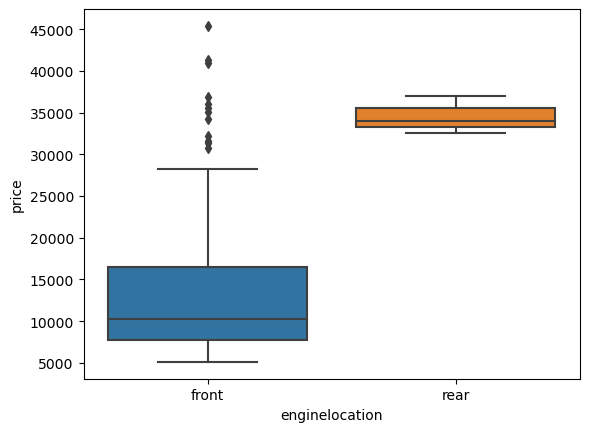

In [41]:
sns.boxplot(x=df['enginelocation'], y=df['price'])

## 3.9 wheelbase 

In [42]:
df.wheelbase.value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheelbase, dtype: int64

In [43]:
df.wheelbase.nunique()         

53

<Axes: xlabel='wheelbase', ylabel='price'>

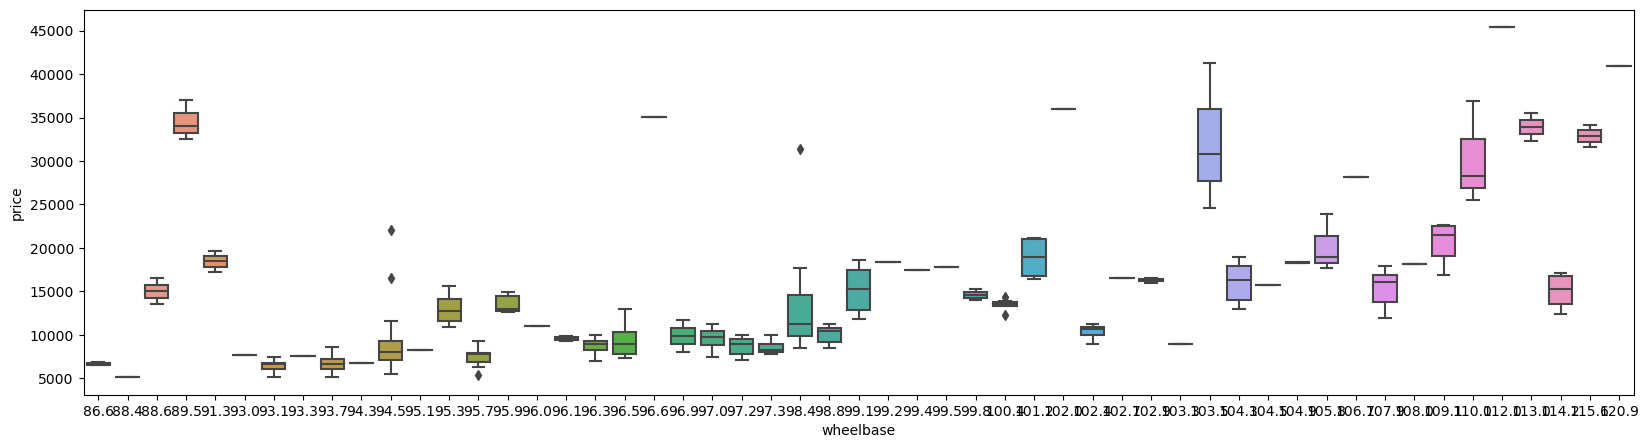

In [44]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['wheelbase'], y=df['price'])

## 3.10 carlength          


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [46]:
df.carlength.nunique()

75

<Axes: xlabel='carlength', ylabel='price'>

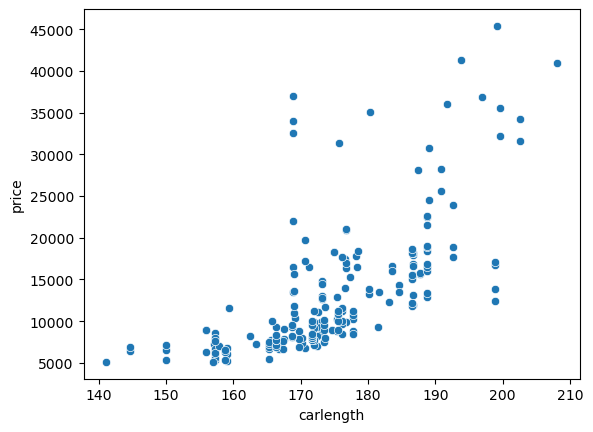

In [47]:
sns.scatterplot(x=df['carlength'],y=df['price'])

## 3.11 carwidth          


In [48]:
df.carwidth.nunique()

44

<Axes: xlabel='carwidth', ylabel='price'>

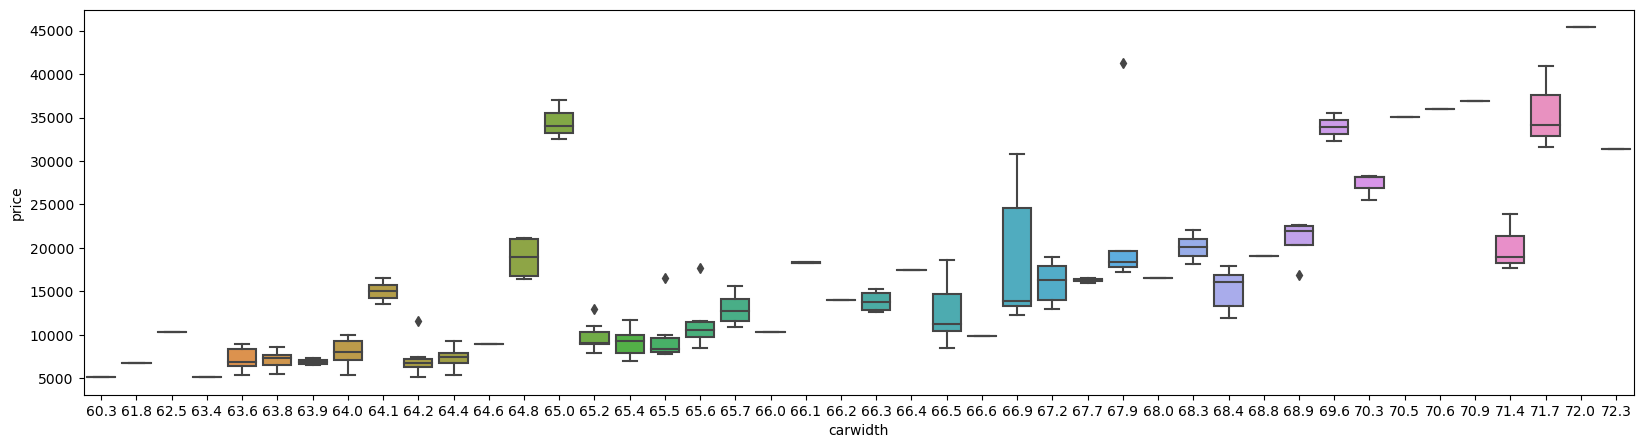

In [49]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['carwidth'], y=df['price'])

<Axes: xlabel='carwidth', ylabel='price'>

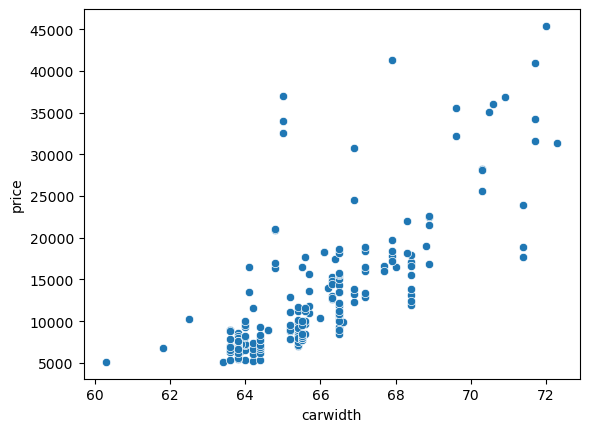

In [50]:
sns.scatterplot(x=df['carwidth'],y=df['price'])

## 3.12 carheight          


In [51]:
df.carheight.nunique()

49

<Axes: xlabel='carheight', ylabel='price'>

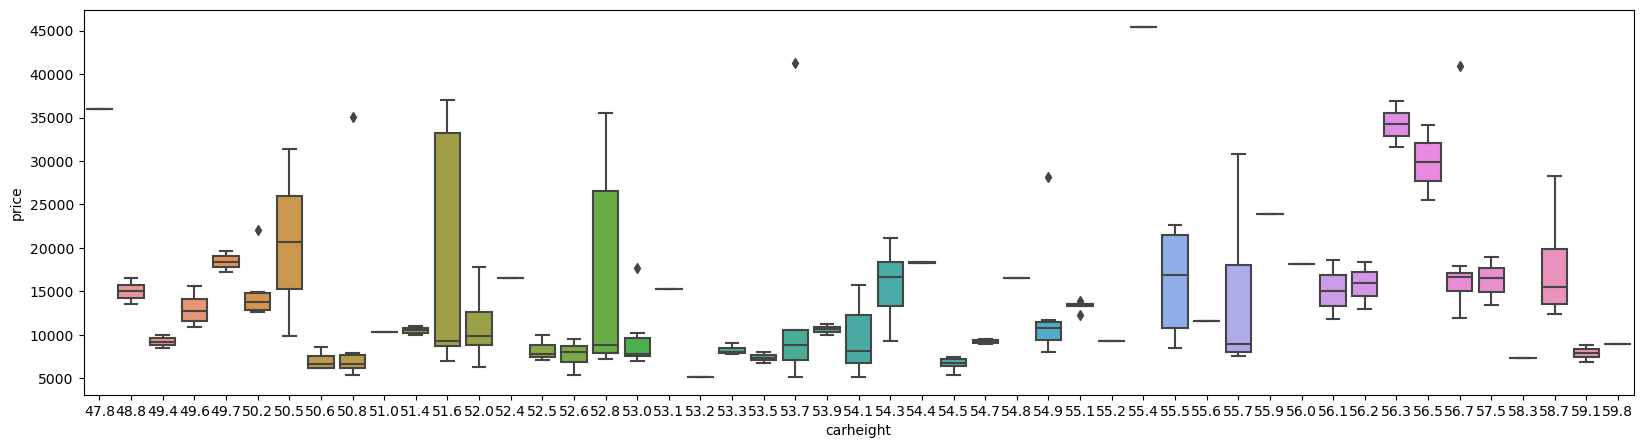

In [52]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['carheight'], y=df['price'])

<Axes: xlabel='carheight', ylabel='price'>

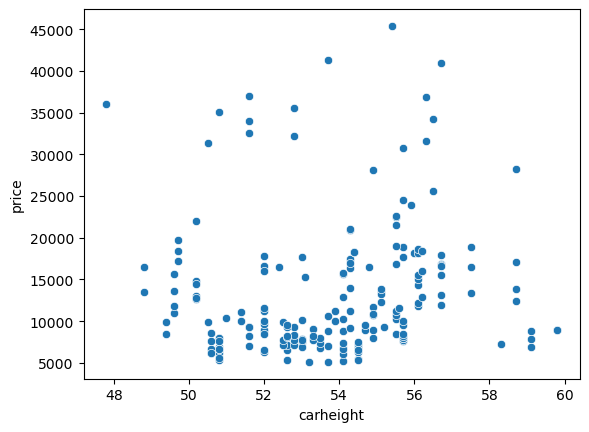

In [53]:
sns.scatterplot(x=df['carheight'],y=df['price'])

## 3.13 curbweight          


In [54]:
df.curbweight.nunique()

171

<Axes: xlabel='curbweight', ylabel='price'>

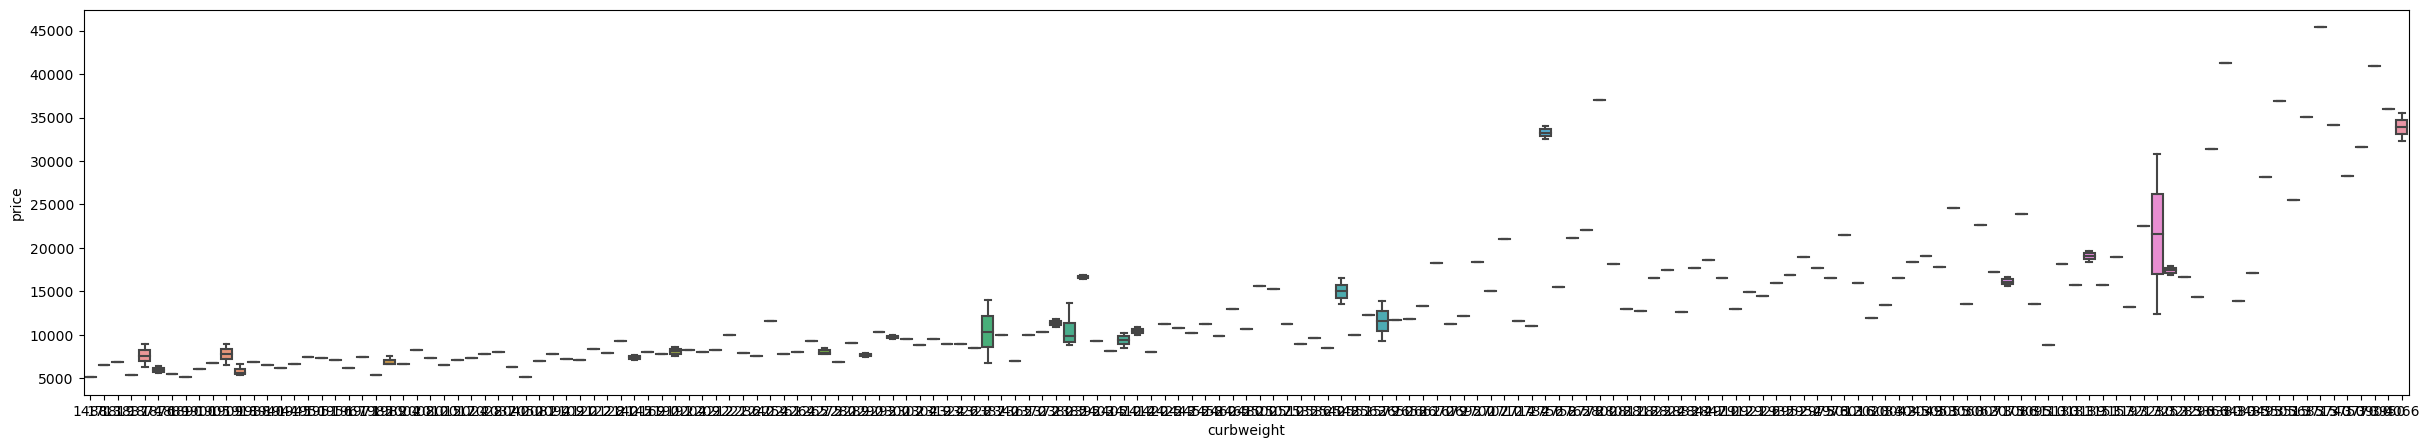

In [55]:
plt.figure(figsize=(30,5))
sns.boxplot(x=df['curbweight'], y=df['price'])

## 3.14  enginetype  


In [56]:
df.enginetype.nunique()

7

In [57]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

<Axes: xlabel='enginetype', ylabel='price'>

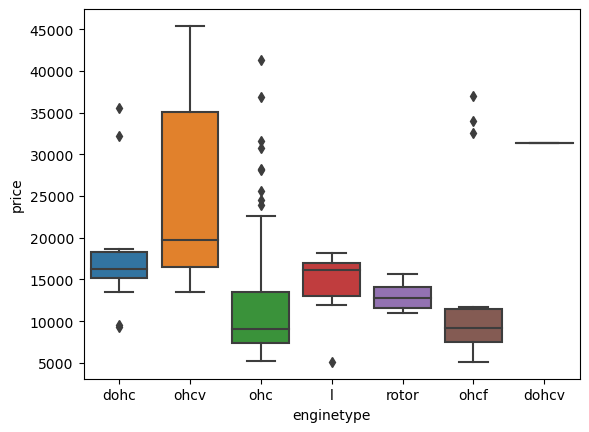

In [58]:
sns.boxplot(x=df['enginetype'], y=df['price'])

## 3.15  cylindernumber 

In [59]:
df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

<Axes: xlabel='cylindernumber', ylabel='price'>

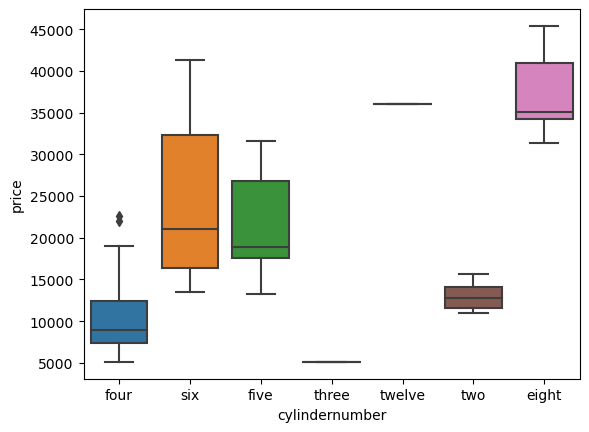

In [60]:
sns.boxplot(x=df['cylindernumber'], y=df['price'])

## 3.16 fuelsystem

In [61]:
# sns.scatterplot(x=df['carheight'],y=df['price'])
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

<Axes: xlabel='fuelsystem', ylabel='price'>

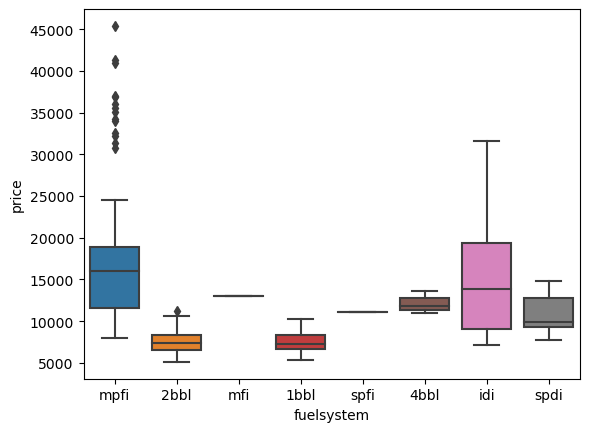

In [62]:
sns.boxplot(x=df['fuelsystem'],y=df['price'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## 3.17 enginesize

In [64]:
df.enginesize.nunique()

44

<Axes: xlabel='enginesize', ylabel='price'>

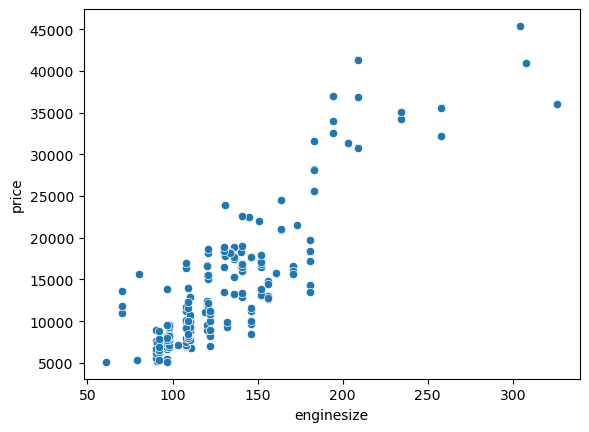

In [65]:
sns.scatterplot(x=df['enginesize'], y=df['price'])

In [66]:
df.boreratio.nunique()

38

<Axes: xlabel='boreratio', ylabel='price'>

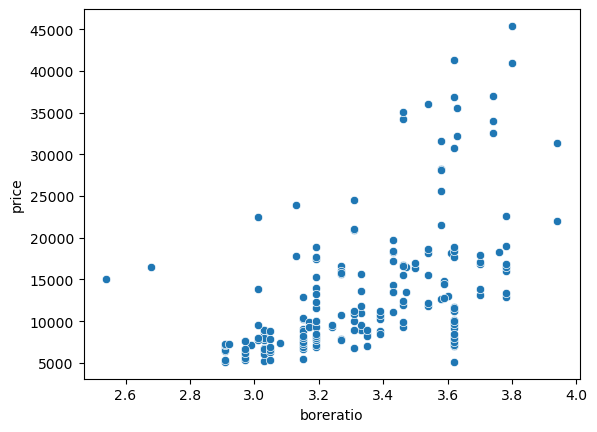

In [67]:
sns.scatterplot(x=df['boreratio'], y=df['price'])

In [68]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


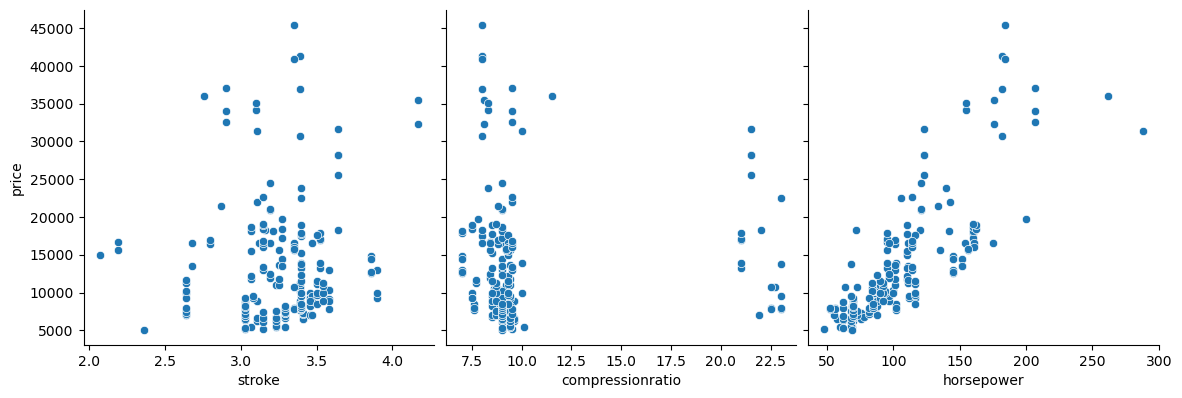

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


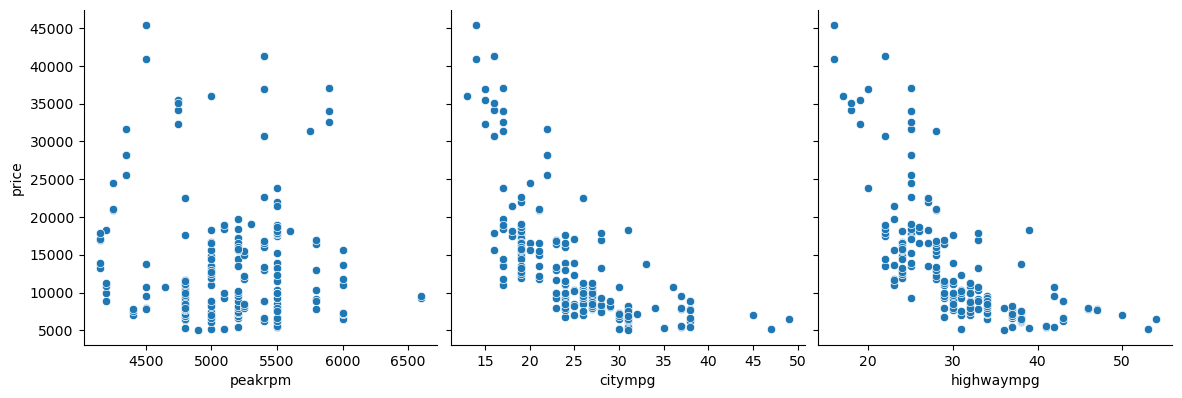

In [69]:
def plot(x,y,z):
    sns.pairplot(df,x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()
plot('stroke','compressionratio', 'horsepower')#, 'peakrpm', 'citympg', 'highwaympg')
plot('peakrpm', 'citympg', 'highwaympg')

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


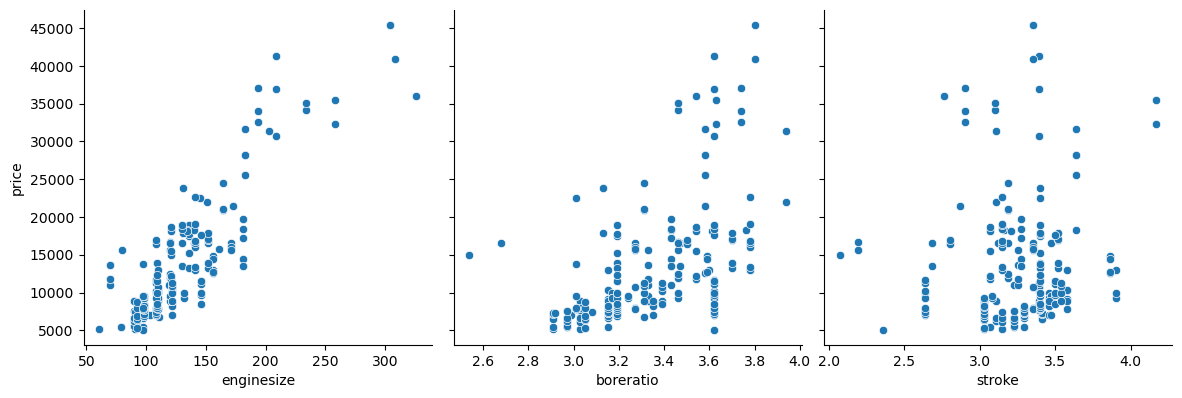

In [70]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')

In [71]:
emp=[]
for index, value in enumerate(df.dtypes):
    if value=='object':
        emp.append(df.columns[index])
df1=pd.DataFrame(df[emp])
df1

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,Alfa-Romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,Alfa-Romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,Alfa-Romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,Audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,Audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,Volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,Volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,Volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,Volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [72]:
dfd=pd.get_dummies(df1, drop_first=True)

In [73]:
dfd

,CompanyName_Alfa-Romero,CompanyName_Audi,CompanyName_BMW,CompanyName_Buick,CompanyName_Chevrolet,CompanyName_Dodge,CompanyName_Honda,CompanyName_Isuzu,CompanyName_Jaguar,CompanyName_Mazda,CompanyName_Mercury,CompanyName_Mitsubishi,CompanyName_Nissan,CompanyName_Peugeot,CompanyName_Plymouth,CompanyName_Porcshce,CompanyName_Renault,CompanyName_Saab,CompanyName_Subaru,CompanyName_Toyota,CompanyName_Volkswagen,CompanyName_Volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [74]:
new_df=pd.concat([df,dfd],axis=1)
new_df

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName_Alfa-Romero,CompanyName_Audi,CompanyName_BMW,CompanyName_Buick,CompanyName_Chevrolet,CompanyName_Dodge,CompanyName_Honda,CompanyName_Isuzu,CompanyName_Jaguar,CompanyName_Mazda,CompanyName_Mercury,CompanyName_Mitsubishi,CompanyName_Nissan,CompanyName_Peugeot,CompanyName_Plymouth,CompanyName_Porcshce,CompanyName_Renault,CompanyName_Saab,CompanyName_Subaru,CompanyName_Toyota,CompanyName_Volkswagen,CompanyName_Volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,Alfa-Romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,3,Alfa-Romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,1,Alfa-Romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,2,Audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,Audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,Volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,202,-1,Volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,203,-1,Volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,204,-1,Volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [75]:
emp

['CompanyName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [76]:
final_df=new_df.drop(emp,axis=1)

In [77]:
final_df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName_Alfa-Romero,CompanyName_Audi,CompanyName_BMW,CompanyName_Buick,CompanyName_Chevrolet,CompanyName_Dodge,CompanyName_Honda,CompanyName_Isuzu,CompanyName_Jaguar,CompanyName_Mazda,CompanyName_Mercury,CompanyName_Mitsubishi,CompanyName_Nissan,CompanyName_Peugeot,CompanyName_Plymouth,CompanyName_Porcshce,CompanyName_Renault,CompanyName_Saab,CompanyName_Subaru,CompanyName_Toyota,CompanyName_Volkswagen,CompanyName_Volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [78]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   car_ID                   205 non-null    int64  
 1   symboling                205 non-null    int64  
 2   wheelbase                205 non-null    float64
 3   carlength                205 non-null    float64
 4   carwidth                 205 non-null    float64
 5   carheight                205 non-null    float64
 6   curbweight               205 non-null    int64  
 7   enginesize               205 non-null    int64  
 8   boreratio                205 non-null    float64
 9   stroke                   205 non-null    float64
 10  compressionratio         205 non-null    float64
 11  horsepower               205 non-null    int64  
 12  peakrpm                  205 non-null    int64  
 13  citympg                  205 non-null    int64  
 14  highwaympg               2

# Assumprions 

## Liner regration

### 1. liniarity

In [79]:
x_df=new_df.drop(dfd,axis=1)

In [80]:

# sns.pairplot(x_df)
# plt.show()

### 2. no multiriniraty

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15532\3102956343.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x_df.corr(),annot=True)


<Axes: >

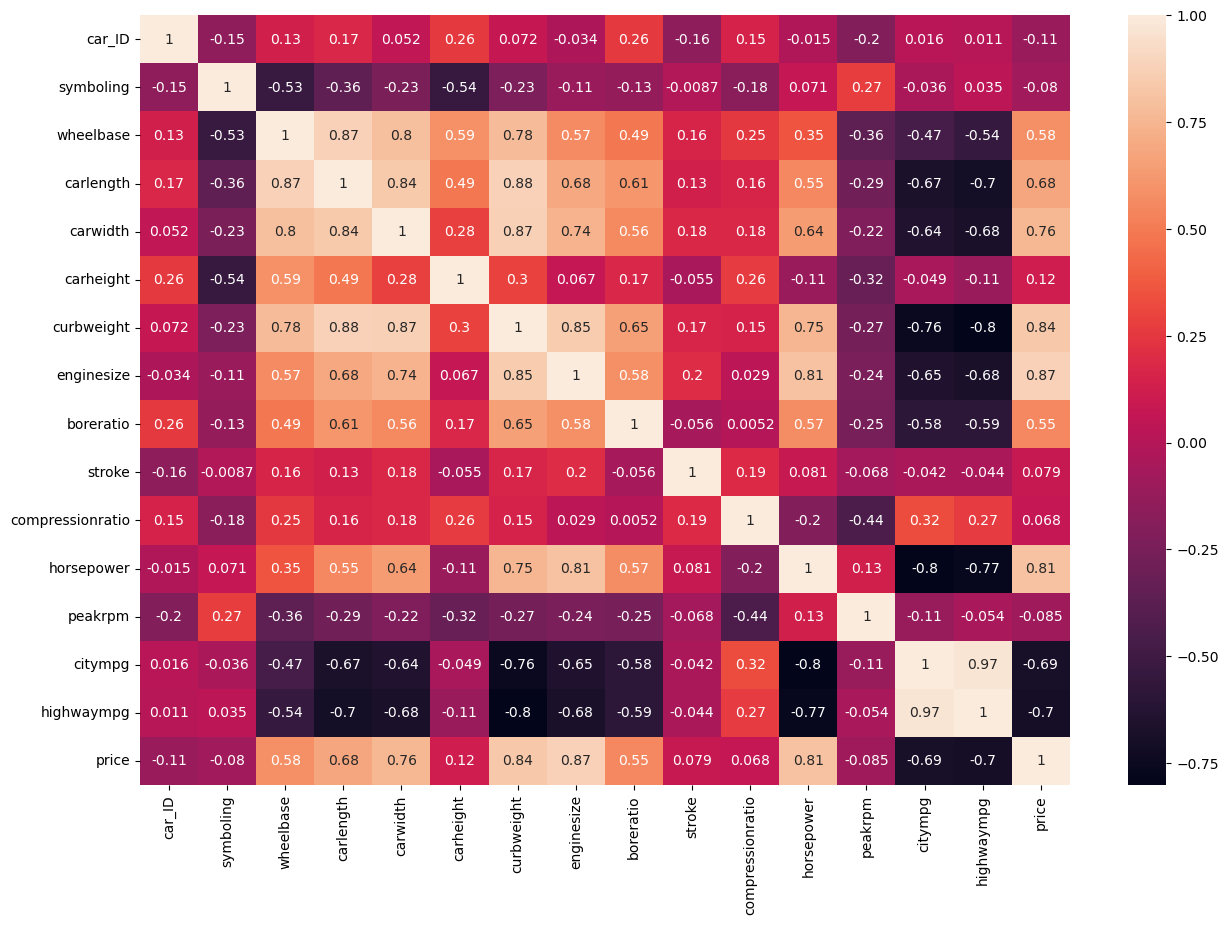

In [81]:
plt.figure(figsize=(15,10))
sns.heatmap(x_df.corr(),annot=True)

In [82]:
# we observe multicolinearity found in data set 
# lets data transformation

# Normalization (0 to 1)

In [83]:
final_df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName_Alfa-Romero,CompanyName_Audi,CompanyName_BMW,CompanyName_Buick,CompanyName_Chevrolet,CompanyName_Dodge,CompanyName_Honda,CompanyName_Isuzu,CompanyName_Jaguar,CompanyName_Mazda,CompanyName_Mercury,CompanyName_Mitsubishi,CompanyName_Nissan,CompanyName_Peugeot,CompanyName_Plymouth,CompanyName_Porcshce,CompanyName_Renault,CompanyName_Saab,CompanyName_Subaru,CompanyName_Toyota,CompanyName_Volkswagen,CompanyName_Volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [84]:
drop_list=['car_ID','doornumber_two', 'price']
final_df_x=final_df.drop(drop_list,axis=1)
final_df_y= final_df['price']

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
obj=MinMaxScaler()
scal_minmaz=obj.fit_transform(final_df_x)
normalise_df=pd.DataFrame(scal_minmaz, columns=final_df_x.columns)
normalise_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CompanyName_Alfa-Romero,CompanyName_Audi,CompanyName_BMW,CompanyName_Buick,CompanyName_Chevrolet,CompanyName_Dodge,CompanyName_Honda,CompanyName_Isuzu,CompanyName_Jaguar,CompanyName_Mazda,CompanyName_Mercury,CompanyName_Mitsubishi,CompanyName_Nissan,CompanyName_Peugeot,CompanyName_Plymouth,CompanyName_Porcshce,CompanyName_Renault,CompanyName_Saab,CompanyName_Subaru,CompanyName_Toyota,CompanyName_Volkswagen,CompanyName_Volvo,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0.2,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.2,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,0.2,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.28

# Standerdisation (-3 to 3)

In [87]:
from sklearn.preprocessing import StandardScaler
obj_std=StandardScaler()
scal_std=obj_std.fit_transform(final_df_x)
stdizs_df=pd.DataFrame(scal_std, columns=final_df_x.columns)
stdizs_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CompanyName_Alfa-Romero,CompanyName_Audi,CompanyName_BMW,CompanyName_Buick,CompanyName_Chevrolet,CompanyName_Dodge,CompanyName_Honda,CompanyName_Isuzu,CompanyName_Jaguar,CompanyName_Mazda,CompanyName_Mercury,CompanyName_Mitsubishi,CompanyName_Nissan,CompanyName_Peugeot,CompanyName_Plymouth,CompanyName_Porcshce,CompanyName_Renault,CompanyName_Saab,CompanyName_Subaru,CompanyName_Toyota,CompanyName_Volkswagen,CompanyName_Volvo,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,8.205689,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.070014,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120,0.328798,-0.469295,-0.201517,-0.720082,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,8.205689,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.070014,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120,0.328798,-0.469295,-0.201517,-0.720082,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,8.205689,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.070014,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120,0.328798,-0.469295,-0.201517,1.388730,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,3.843076,-0.141069,-0.238120,-1.859172,2.746210,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,-0.121867,5.318432,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.070014,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120,0.328798,-0.469295,-0.201517,-0.720082,1.065559,-0.372678,0.841625,-0.767559,-0.121867,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,-0.121867,5.318432,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.070014,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120,0.328798,-0.469295,-0.201517,-0.720082,1.065559,-0.372678,-1.188177,-0.767559,-0.121867,-0.07001

# linear regration not perform well on given data so we will check with the other algoritham

In [88]:
final_df_y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [89]:
normalise_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CompanyName_Alfa-Romero,CompanyName_Audi,CompanyName_BMW,CompanyName_Buick,CompanyName_Chevrolet,CompanyName_Dodge,CompanyName_Honda,CompanyName_Isuzu,CompanyName_Jaguar,CompanyName_Mazda,CompanyName_Mercury,CompanyName_Mitsubishi,CompanyName_Nissan,CompanyName_Peugeot,CompanyName_Plymouth,CompanyName_Porcshce,CompanyName_Renault,CompanyName_Saab,CompanyName_Subaru,CompanyName_Toyota,CompanyName_Volkswagen,CompanyName_Volvo,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0.2,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.2,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,0.2,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.28

# model building normlization

In [90]:
x=final_df.drop('price',axis=1)
x

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CompanyName_Alfa-Romero,CompanyName_Audi,CompanyName_BMW,CompanyName_Buick,CompanyName_Chevrolet,CompanyName_Dodge,CompanyName_Honda,CompanyName_Isuzu,CompanyName_Jaguar,CompanyName_Mazda,CompanyName_Mercury,CompanyName_Mitsubishi,CompanyName_Nissan,CompanyName_Peugeot,CompanyName_Plymouth,CompanyName_Porcshce,CompanyName_Renault,CompanyName_Saab,CompanyName_Subaru,CompanyName_Toyota,CompanyName_Volkswagen,CompanyName_Volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [91]:
y=final_df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

In [93]:
x_train,x_test, y_train, y_test=train_test_split (x,y,test_size=.25, random_state=10)
linear_reg_model=LinearRegression()
linear_reg_model.fit(x_train,y_train)

LinearRegression()

In [94]:
y_pred_test=linear_reg_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print(f'{mse=}')
r2=r2_score(y_test,y_pred_test)
print(f'{r2=}')
mae = mean_absolute_error(y_test,y_pred_test)
print(f'MAE = {mae}')

mse=5010120.48565169
r2=0.9138720718235477
MAE = 1684.5861105888046


In [95]:
x=final_df.drop(['car_ID','price'],axis=1)
x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CompanyName_Alfa-Romero,CompanyName_Audi,CompanyName_BMW,CompanyName_Buick,CompanyName_Chevrolet,CompanyName_Dodge,CompanyName_Honda,CompanyName_Isuzu,CompanyName_Jaguar,CompanyName_Mazda,CompanyName_Mercury,CompanyName_Mitsubishi,CompanyName_Nissan,CompanyName_Peugeot,CompanyName_Plymouth,CompanyName_Porcshce,CompanyName_Renault,CompanyName_Saab,CompanyName_Subaru,CompanyName_Toyota,CompanyName_Volkswagen,CompanyName_Volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [96]:
y=final_df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [97]:
x_train,x_test, y_train, y_test=train_test_split (x,y,test_size=.25, random_state=44)
linear_reg_model=LinearRegression()
linear_reg_model.fit(x_train,y_train)
y_pred_test=linear_reg_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print(f'{mse=}')
r2=r2_score(y_test,y_pred_test)
print(f'{r2=}')
mae = mean_absolute_error(y_test,y_pred_test)
print(f'MAE = {mae}')

mse=5141399.698038799
r2=0.9196576336280484
MAE = 1690.3277254845657


## Training Data Evalution

In [98]:
y_pred_train = linear_reg_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)

In [99]:
y_pred_train = linear_reg_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print(f"{mse=}")

rmse = np.sqrt(mse)
print(f'RMSE={rmse}')

r2 = r2_score(y_train,y_pred_train)
print(f"R sequared ={r2}")

adj_r2 = 1 - ( ((1-r2) * (len(x_train)-1)) /  (len(x_train)-len(x.columns)-1 ))
print(f"Adjusted R- Sequared = {adj_r2}")

# mean_absolte_error = sum |(y_pred - y_actual )|/ n

mae = mean_absolute_error(y_train,y_pred_train)
print(f'MAE = {mae}')

mse=2160319.3269409533
RMSE=1469.802478886518
R sequared =0.9658552574290759
Adjusted R- Sequared = 0.940344817577236
MAE = 1077.732634418268


## Testing data Evaluation

In [100]:
y_pred_test = linear_reg_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print(f"{mse=}")

rmse = np.sqrt(mse)
print(f'RMSE={rmse}')

r2 = r2_score(y_test,y_pred_test)
print(f"R sequared ={r2}")

adj_r2 = 1 - ( ((1-r2) * (len(x_test)-1)) /  (len(x_test)-len(x.columns)-1 ))
print(f"Adjusted R- Sequared = {adj_r2}")

# mean_absolte_error = sum |(y_pred - y_actual )|/ n

mae = mean_absolute_error(y_test,y_pred_test)
print(f'MAE = {mae}')

mse=5141399.698038799
RMSE=2267.4654789078486
R sequared =0.9196576336280484
Adjusted R- Sequared = 1.2926757632121093
MAE = 1690.3277254845657


# Outlier Handling 

In [101]:
final_df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName_Alfa-Romero,CompanyName_Audi,CompanyName_BMW,CompanyName_Buick,CompanyName_Chevrolet,CompanyName_Dodge,CompanyName_Honda,CompanyName_Isuzu,CompanyName_Jaguar,CompanyName_Mazda,CompanyName_Mercury,CompanyName_Mitsubishi,CompanyName_Nissan,CompanyName_Peugeot,CompanyName_Plymouth,CompanyName_Porcshce,CompanyName_Renault,CompanyName_Saab,CompanyName_Subaru,CompanyName_Toyota,CompanyName_Volkswagen,CompanyName_Volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [123]:
# Decision tree model
from sklearn.tree import DecisionTreeRegressor

In [124]:
tree_model= DecisionTreeRegressor()

In [125]:
x_train,x_test, y_train, y_test=train_test_split (x,y,test_size=.25, random_state=42)
tree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [134]:
# Testing data Evaluation
y_pred_test = tree_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print(f"{mse=}")

rmse = np.sqrt(mse)
print(f'RMSE={rmse}')

r2 = r2_score(y_test,y_pred_test)
print(f"R sequared ={r2}")

adj_r2 = 1 - ((1 - r2) * (len(x_test)- 1) / (len(x_test)- len(x.columns)- 1))
print(f"Adjusted R- Sequared = {adj_r2}")
# adj_r2score=1-(((1-r2)*(len(x_test)-1))/(len(x_test))-(len(x.columns))-(1))
# print(f"Adjusted R- Sequared = {adj_r2score}")

# mean_absolte_error = sum |(y_pred - y_actual )|/ n

mae = mean_absolute_error(y_test,y_pred_test)
print(f'MAE = {mae}')

mse=8755518.473728634
RMSE=2958.972536832445
R sequared =0.8705944663932621
Adjusted R- Sequared = 1.4714058724245453
Adjusted R- Sequared = 66.87308303434723
MAE = 1852.1955192307692


In [127]:
# Training data 
y_pred_train = tree_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print(f"{mse=}")

rmse = np.sqrt(mse)
print(f'RMSE={rmse}')

r2 = r2_score(y_train,y_pred_train)
print(f"R sequared ={r2}")

adj_r2 = 1 - ( ((1-r2) * (len(x_train)-1)) /  (len(x_train)-len(x.columns)-1 ))
print(f"Adjusted R- Sequared = {adj_r2}")

# mean_absolte_error = sum |(y_pred - y_actual )|/ n

mae = mean_absolute_error(y_train,y_pred_train)
print(f'MAE = {mae}')

mse=75106.2908496732
RMSE=274.05526969878395
R sequared =0.9987899333091715
Adjusted R- Sequared = 0.9978858604941847
MAE = 52.64705882352941
